**Install and Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


**Load And Explore Dataset**

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [11]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Preprocess the DATA**

In [13]:
df_cleaned = df.drop(["CustomerID", "Genre"], axis =1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

**K-Means Clustering**

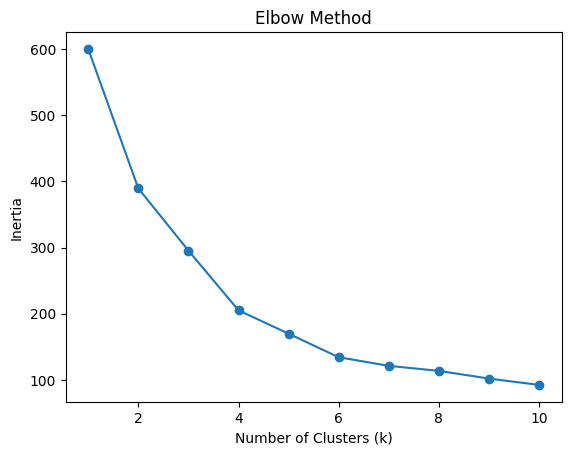

In [15]:
inertia =[]
k_range = range(1,11)
for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state =42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)


plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show()

**Fit K-Means Clustering and Visualize Clusters**

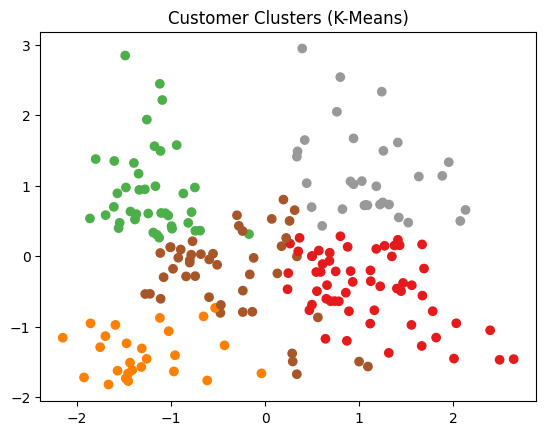

In [17]:
kmeans = KMeans(n_clusters = 5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c =labels_kmeans, cmap='Set1')
plt.title("Customer Clusters (K-Means)")
plt.show()

**DBSCAN Clustering**

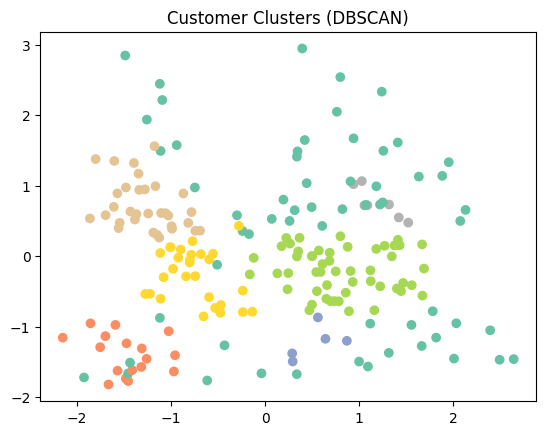

In [22]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap = "Set2")
plt.title("Customer Clusters (DBSCAN)")
plt.show()

**Evaluation**

In [23]:
print("Silhouette Score (KMeans):", silhouette_score(X_scaled, labels_kmeans))
print("Silhouette Score (DBSCAN):", silhouette_score(X_scaled, labels_db))

Silhouette Score (KMeans): 0.40846873777345605
Silhouette Score (DBSCAN): 0.18451372756506046


**Cluster using only Annual Income & Spending Score**

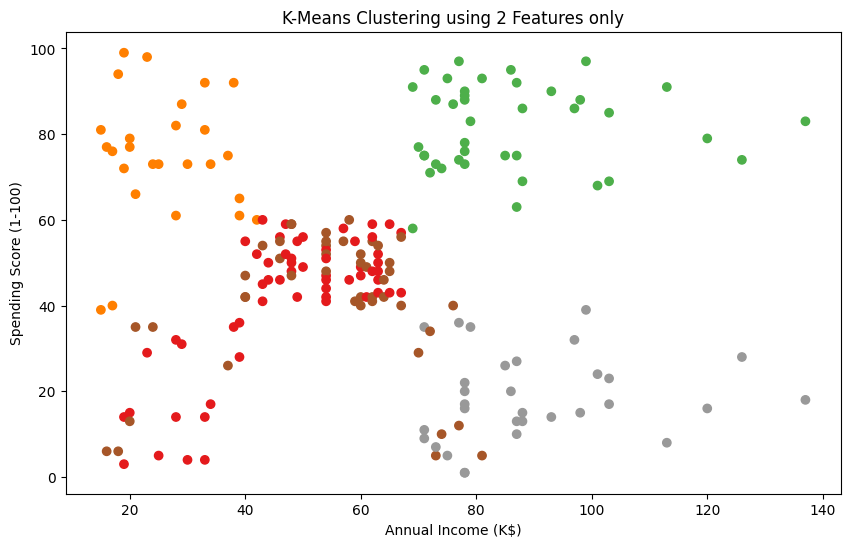

In [27]:
X_two_features = df_cleaned[["Annual Income (k$)", "Spending Score (1-100)"]]
X_scaled_2 = scaler.fit_transform(X_two_features)

kmeans_2 = KMeans(n_clusters = 5, random_state=42)
labels_kmeans_2 = kmeans_2.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_two_features["Annual Income (k$)"], X_two_features["Spending Score (1-100)"], c=labels_kmeans_2, cmap = 'Set1' )
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering using 2 Features only")
plt.show()

**Visualize Clusters Using t-SNE**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


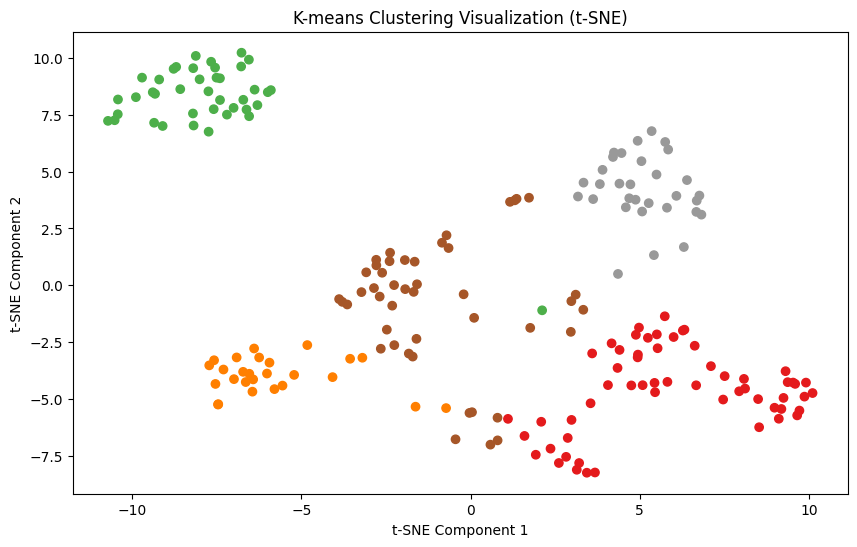

In [28]:
tsne = TSNE(n_components =2, perplexity = 30, n_iter = 300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_kmeans, cmap = 'Set1')
plt.title("K-means Clustering Visualization (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

**Agglomerative Clustering**

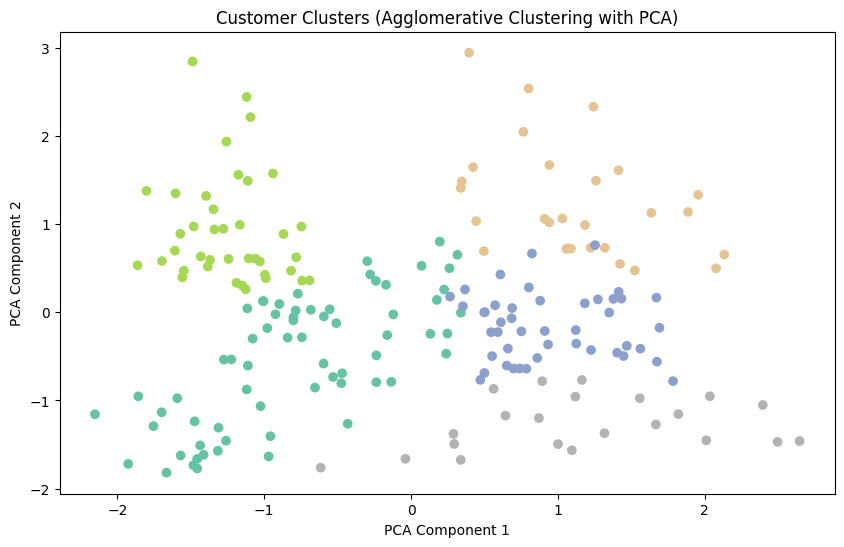

In [29]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c = labels_agg, cmap='Set2')
plt.title("Customer Clusters (Agglomerative Clustering with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [30]:
print("Silhouette Score (Agglomerative):", silhouette_score(X_scaled, labels_agg))


Silhouette Score (Agglomerative): 0.39002826186267214
